# **Covid-19 Policies Evaluation and Impact Prediction**

## Table of Content


* [Part 1: Introduction](#Part-1:-Introduction)
* [Part 2: Data Exploration](#Part-2:-Data-Exploration)
* [Part 3: Feature Preprocessing](#Part-3:-Feature-Preprocessing)
* [Part 4: Exploratory Data Analysis](#Part-3:-feature-preprocessing)
* [Part 4:Model training](#Part-3:-model-training)


## Part 1: Introduction


1.   Evaluating the effectiveness of Covid-19 policies is crucial for governments and organizations as it directly influences public health outcomes and socio-economic stability. Covid-19, caused by the SARS-CoV-2 virus, has led to a global pandemic that has affected millions of lives and disrupted economies worldwide.
2.   Covid-19 policies encompass various measures such as lockdowns, social distancing, travel restrictions, mask mandates, and vaccination campaigns, which have been implemented globally to mitigate the spread of the virus and reduce its impact. Assessing these policies helps in understanding their effectiveness, optimizing resource allocation, and making informed decisions to better handle current and future pandemics.

3.  In this project, supervised learning models are used to predict the impact of different Covid-19 policies using data from the Oxford Covid-19 Government Response Tracker([OxCGRT Dataset information](https://github.com/OxCGRT/covid-policy-dataset)). Additionally, the key factors that influence the effectiveness of these policies are analyzed. By doing so, insights that aim to provide can guide policymakers in designing strategies that minimize adverse effects and enhance public health responses. This project not only contributes to immediate pandemic response but also prepares for better management of potential future health crises.

## Part 2: Data Exploration

In [ ]:
# 1.Download and import necessary libraries
!pip install pyecharts
!pip install -U -q PyDrive
!pip install pyecharts pyecharts-jupyter-installer
!pip install snapshot-selenium

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pyecharts
import pyecharts.options as opts
from pyecharts.charts import Map
from pyecharts.globals import CurrentConfig, NotebookType
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.globals import CurrentConfig
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot
from IPython.display import HTML, display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00


In [ ]:
# 2.Load the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
id = "1XFG-ap_oiZnyjzlnJfeZQQMo8Y0WUfNX"
file = drive.CreateFile({'id':id})
file.GetContentFile('OxCGRT_compact_national_v1.csv')

International_Covid_data = pd.read_csv('OxCGRT_compact_national_v1.csv')

In [ ]:
# 3.Explore the first 5 observations of data
International_Covid_data.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 4.Explore the last 5 observations of data
International_Covid_data.tail()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
202755,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221227,1.0,1.0,2.0,1.0,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
202756,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221228,1.0,1.0,2.0,1.0,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
202757,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221229,1.0,1.0,2.0,1.0,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
202758,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221230,1.0,1.0,2.0,1.0,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0
202759,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20221231,1.0,1.0,2.0,1.0,...,5,1.0,259981.0,5637.0,NV,29.11,29.48,36.44,41.65,0.0


In [ ]:
# 5.Explore the shape of data
rows, columns = International_Covid_data.shape
print(f'The International_Covid_data contains {rows} rows and {columns} columns.')
print()

The International_Covid_data contains 202760 rows and 56 columns.



In [ ]:
# 6.Explore the data info
International_Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 

In [ ]:
# 7.Explore central tendency, dispersion excluding NaN values.
International_Covid_data.describe()

,RegionName,RegionCode,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,...,V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
count,0.0,0.0,2.027600e+05,202760.000000,128263.000000,202760.000000,133824.000000,202760.000000,138576.000000,202760.000000,...,127138.000000,202760.000000,90957.000000,2.016640e+05,2.016640e+05,200568.000000,202760.000000,202760.000000,202760.000000,202760.000000
mean,NaN,NaN,2.021066e+07,1.193199,0.835268,1.149645,0.797630,1.103250,0.858857,2.010209,...,1.803316,3.100533,0.278681,1.340886e+06,1.955307e+04,22.603420,42.675426,44.857776,46.699253,31.968029
std,NaN,NaN,8.174621e+03,1.139102,0.370940,0.988767,0.401768,0.851878,0.348170,1.710198,...,0.471447,2.411897,0.448353,5.583371e+06,7.556113e+04,29.597555,24.930305,19.649721,19.865910,32.962193
min,NaN,NaN,2.020010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.020098e+07,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,5.146750e+03,6.400000e+01,0.000000,22.220000,31.250000,33.330000,0.000000
50%,NaN,NaN,2.021070e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,2.000000,5.000000,0.000000,5.987900e+04,8.650000e+02,2.330000,42.590000,46.880000,48.720000,25.000000
75%,NaN,NaN,2.022040e+07,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,5.218538e+05,7.470000e+03,46.570000,62.040000,60.000000,62.020000,62.500000
max,NaN,NaN,2.022123e+07,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,1.007653e+08,1.092764e+06,105.750000,100.000000,91.150000,93.450000,100.000000


In [ ]:
# 8.Explore columns
International_Covid_data.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1M_School closing', 'C1M_Flag',
       'C2M_Workplace closing', 'C2M_Flag', 'C3M_Cancel public events',
       'C3M_Flag', 'C4M_Restrictions on gatherings', 'C4M_Flag',
       'C5M_Close public transport', 'C5M_Flag',
       'C6M_Stay at home requirements', 'C6M_Flag',
       'C7M_Restrictions on internal movement', 'C7M_Flag',
       'C8EV_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6M_Facial Coverings', 'H6M_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8M_Protection of elderly people', 'H8M_Flag',
       'V1_Vaccine Prioritisation (summary)',
       'V2A_Vaccine Availability (summary)',
      

In [ ]:
# Explore the unique values for each column
International_Covid_data.nunique()

,0
CountryName,185
CountryCode,185
RegionName,0
RegionCode,0
Jurisdiction,1
Date,1096
C1M_School closing,4
C1M_Flag,2
C2M_Workplace closing,4
C2M_Flag,2


In [ ]:
# Explore attributes' type
International_Covid_data.dtypes

,0
CountryName,object
CountryCode,object
RegionName,float64
RegionCode,float64
Jurisdiction,object
Date,int64
C1M_School closing,float64
C1M_Flag,float64
C2M_Workplace closing,float64
C2M_Flag,float64


In [ ]:
# 9.Explore missing values
International_Covid_data.isnull().sum()

,0
CountryName,0
CountryCode,0
RegionName,202760
RegionCode,202760
Jurisdiction,0
Date,0
C1M_School closing,0
C1M_Flag,74497
C2M_Workplace closing,0
C2M_Flag,68936


In [ ]:
# 10.Explore the missing value rate for each feature
(International_Covid_data.shape[0]-International_Covid_data.count())/International_Covid_data.shape[0]

,0
CountryName,0.000000
CountryCode,0.000000
RegionName,1.000000
RegionCode,1.000000
Jurisdiction,0.000000
Date,0.000000
C1M_School closing,0.000000
C1M_Flag,0.367415
C2M_Workplace closing,0.000000
C2M_Flag,0.339988


In [ ]:
# 11.Explore duplicated values
International_Covid_data.duplicated().sum()

0

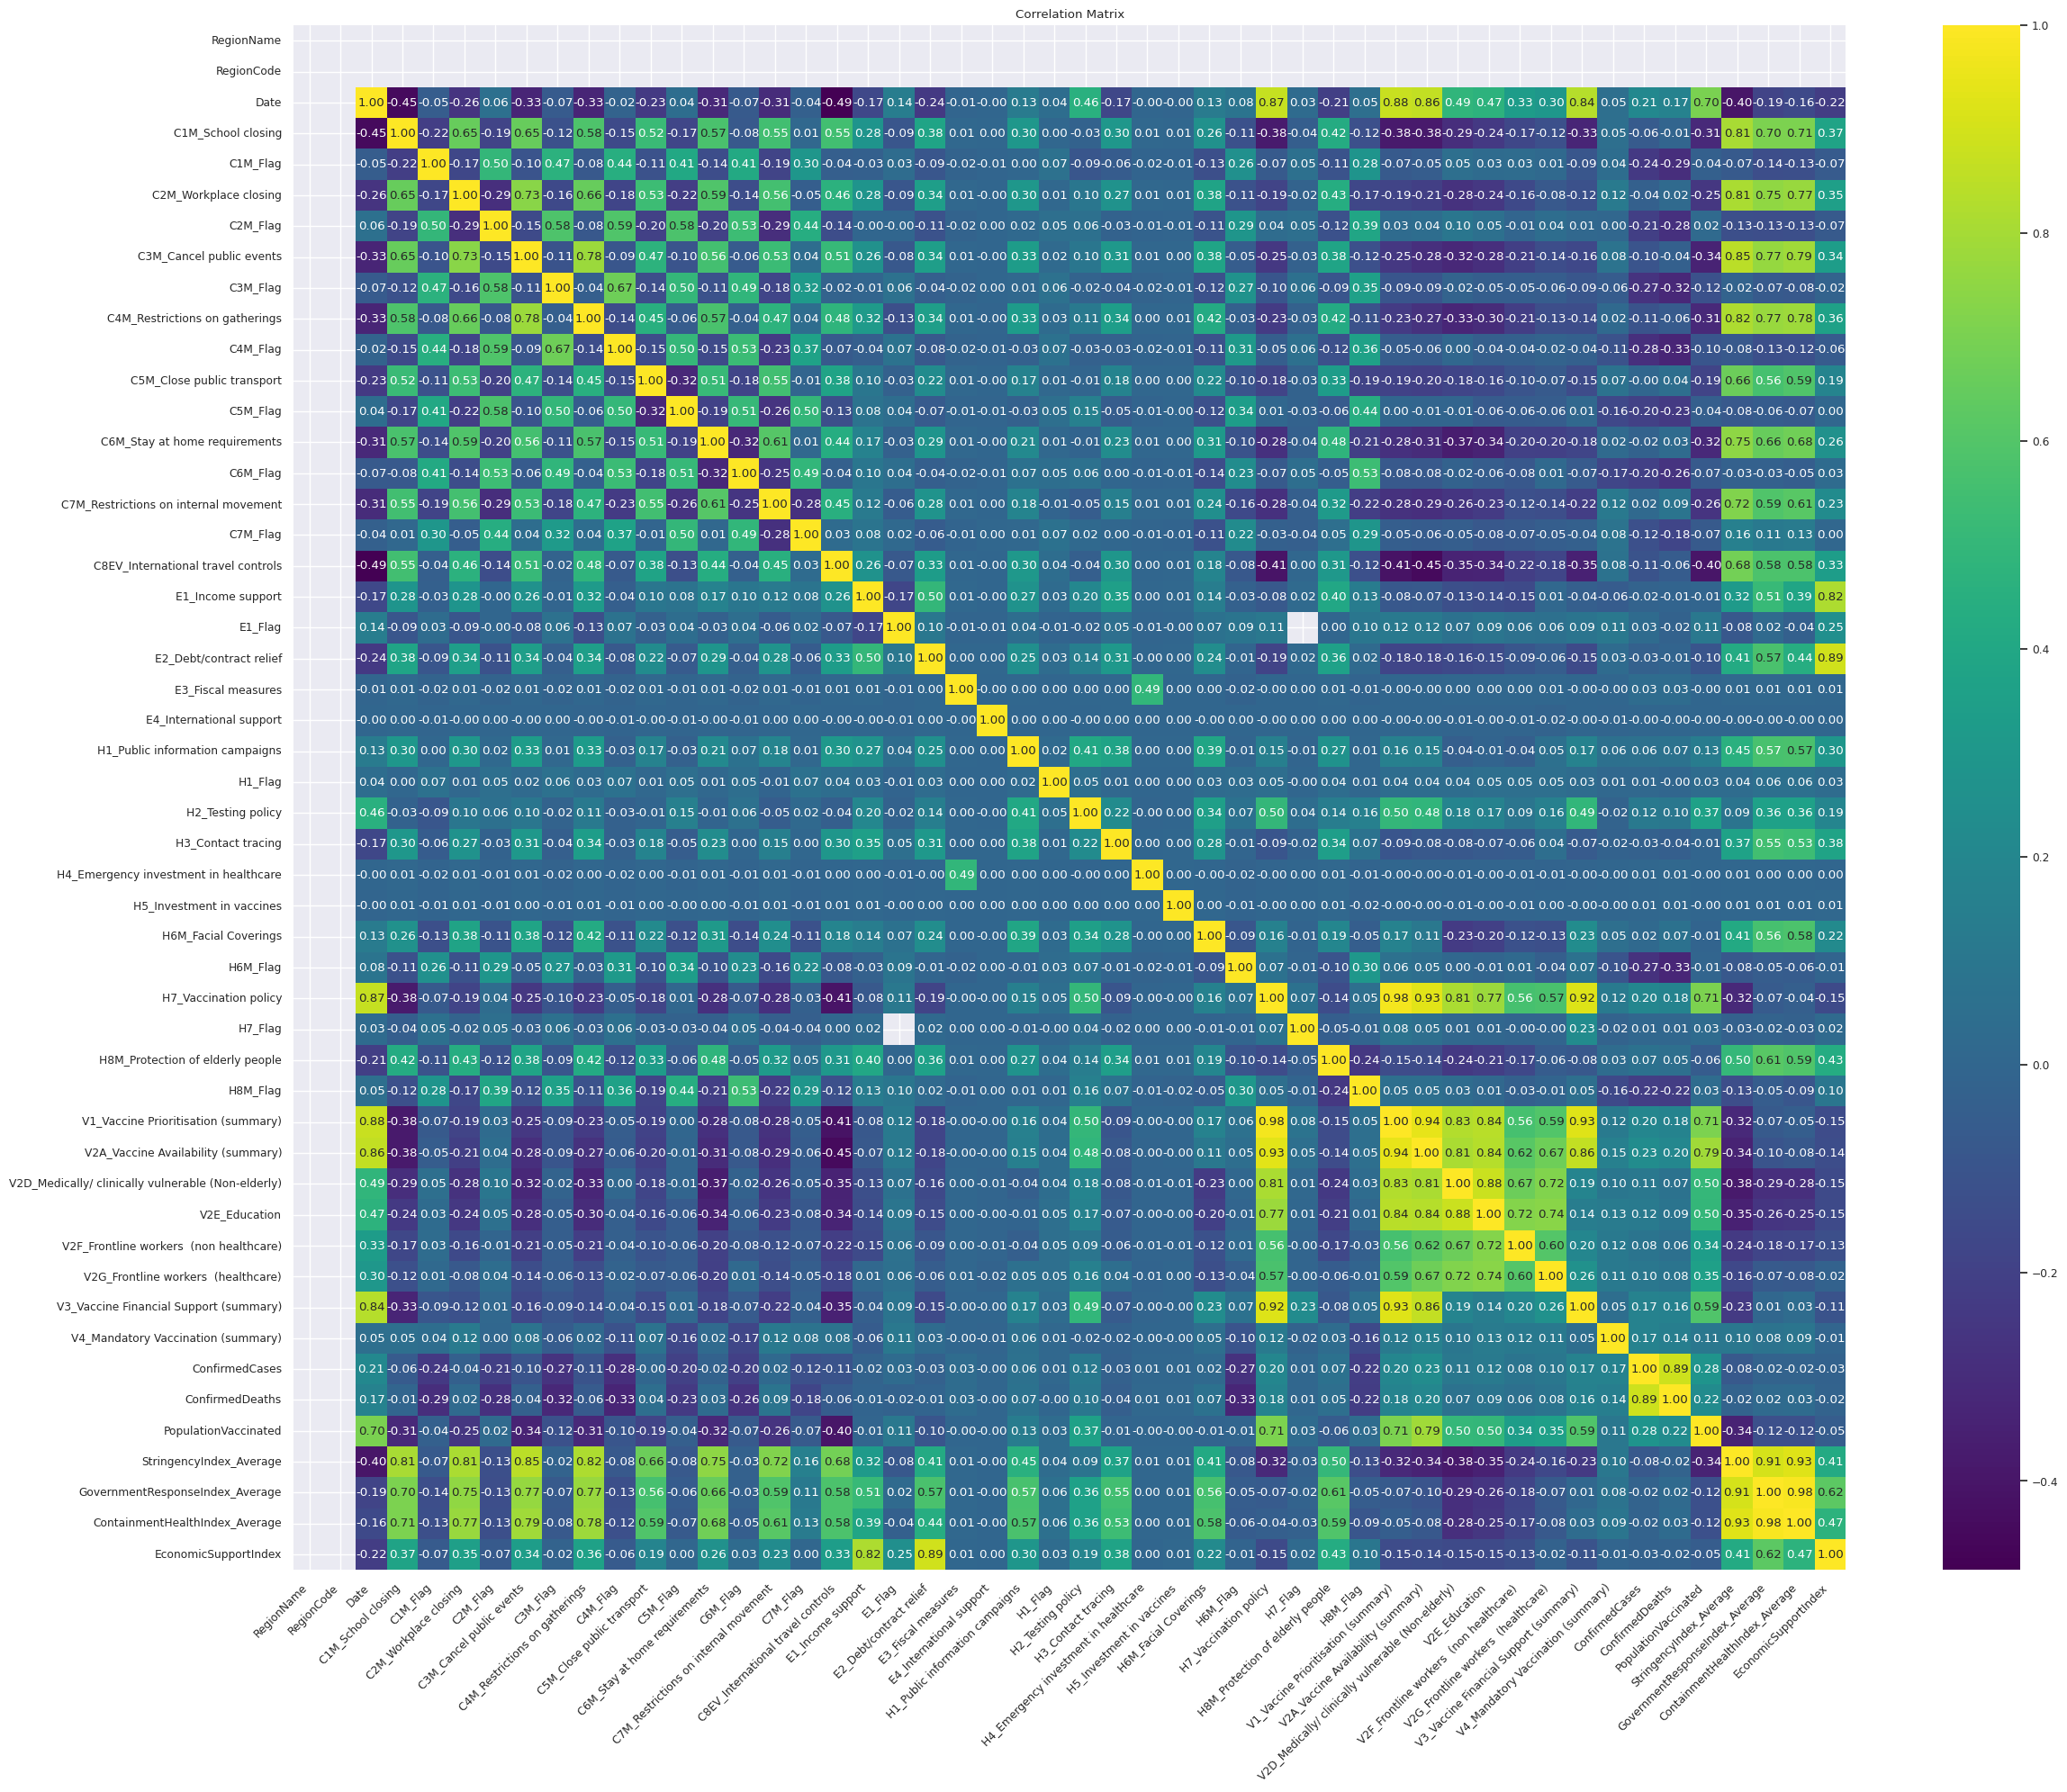

In [ ]:
# 12. Pre-Exploratory Data Analysis
correlation_matrix = International_Covid_data.corr(numeric_only=True)  # Explicitly set numeric_only to True to avoid FutureWarning

# Set the figure size and resolution
plt.figure(figsize=(25, 20))
sns.set(font_scale=0.8)  # Adjust font size for better readability

# Visualize correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Part 3 : Feature preprocessing

In [ ]:
# Drop unessary columns
# 1. No direct correlation with comfiremed case and comfiremed death
columns_to_drop = ['CountryCode', 'RegionName', 'RegionCode', 'Jurisdiction',
                   'C1M_Flag', 'C2M_Flag', 'C3M_Flag', 'C4M_Flag',
                   'C5M_Flag', 'C6M_Flag', 'C7M_Flag', 'E1_Flag',
                   'H1_Flag', 'H6M_Flag', 'H7_Flag', 'H8M_Flag']
International_Covid_data.drop(columns=columns_to_drop, inplace=True)
International_Covid_data.head()

,CountryName,Date,C1M_School closing,C2M_Workplace closing,C3M_Cancel public events,C4M_Restrictions on gatherings,C5M_Close public transport,C6M_Stay at home requirements,C7M_Restrictions on internal movement,C8EV_International travel controls,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


### 1. Data cleaning

In [ ]:
International_Covid_data.isnull().sum()
# E3_Fiscal measures, E4_International support, H4_Emergency investment in healthcare,
# H5_Investment in vaccine, V2B_Vaccine age eligibility/availability age floor (general population summary)
# V2C_Vaccine age eligibility/availability age floor (at risk summary)
# V2D_Medically/ clinically vulnerable (Non-elderly)
# V2E_Education
# V2F_Frontline workers  (non healthcare)
# V2G_Frontline workers  (healthcare)
# V3_Vaccine Financial Support (summary)
# ConfirmedCases
# ConfirmedDeaths
# MajorityVaccinated
# PopulationVaccinated

,0
CountryName,0
Date,0
C1M_School closing,0
C2M_Workplace closing,0
C3M_Cancel public events,0
C4M_Restrictions on gatherings,0
C5M_Close public transport,0
C6M_Stay at home requirements,0
C7M_Restrictions on internal movement,0
C8EV_International travel controls,0


In [ ]:
International_Covid_data = International_Covid_data.groupby('CountryName').apply(lambda group: group.ffill().bfill()).reset_index(drop=True)

In [ ]:
International_Covid_data.isnull().sum()

,0
CountryName,0
Date,0
C1M_School closing,0
C2M_Workplace closing,0
C3M_Cancel public events,0
C4M_Restrictions on gatherings,0
C5M_Close public transport,0
C6M_Stay at home requirements,0
C7M_Restrictions on internal movement,0
C8EV_International travel controls,0


In [ ]:
missing_values = International_Covid_data.isnull().sum()
print(missing_values[missing_values > 0])

# Handle remaining missing values
# Fill categorical columns with mode
categorical_columns = [
    'V2B_Vaccine age eligibility/availability age floor (general population summary)',
    'V2C_Vaccine age eligibility/availability age floor (at risk summary)',
    'V2D_Medically/ clinically vulnerable (Non-elderly)',
    'V2E_Education',
    'V2F_Frontline workers (non healthcare)',
    'V2G_Frontline workers (healthcare)',
    'MajorityVaccinated',
    'V2F_Frontline workers  (non healthcare)',
    'V2G_Frontline workers  (healthcare)'
]

for col in categorical_columns:
    if col in International_Covid_data.columns:
        mode_value = International_Covid_data[col].mode()[0]
        International_Covid_data[col].fillna(mode_value, inplace=True)

# Fill numerical columns with mean
numerical_columns = [
    'ConfirmedCases',
    'ConfirmedDeaths',
    'PopulationVaccinated'
]

for col in numerical_columns:
    if col in International_Covid_data.columns:
        mean_value = International_Covid_data[col].mean()
        International_Covid_data[col].fillna(mean_value, inplace=True)

V2B_Vaccine age eligibility/availability age floor (general population summary)    3288
V2C_Vaccine age eligibility/availability age floor (at risk summary)               2192
V2D_Medically/ clinically vulnerable (Non-elderly)                                 1096
V2E_Education                                                                      1096
V2F_Frontline workers  (non healthcare)                                            1096
V2G_Frontline workers  (healthcare)                                                1096
ConfirmedCases                                                                     1096
ConfirmedDeaths                                                                    1096
MajorityVaccinated                                                                 2192
PopulationVaccinated                                                               2192
dtype: int64


In [ ]:
International_Covid_data.isnull().sum()

,0
CountryName,0
Date,0
C1M_School closing,0
C2M_Workplace closing,0
C3M_Cancel public events,0
C4M_Restrictions on gatherings,0
C5M_Close public transport,0
C6M_Stay at home requirements,0
C7M_Restrictions on internal movement,0
C8EV_International travel controls,0


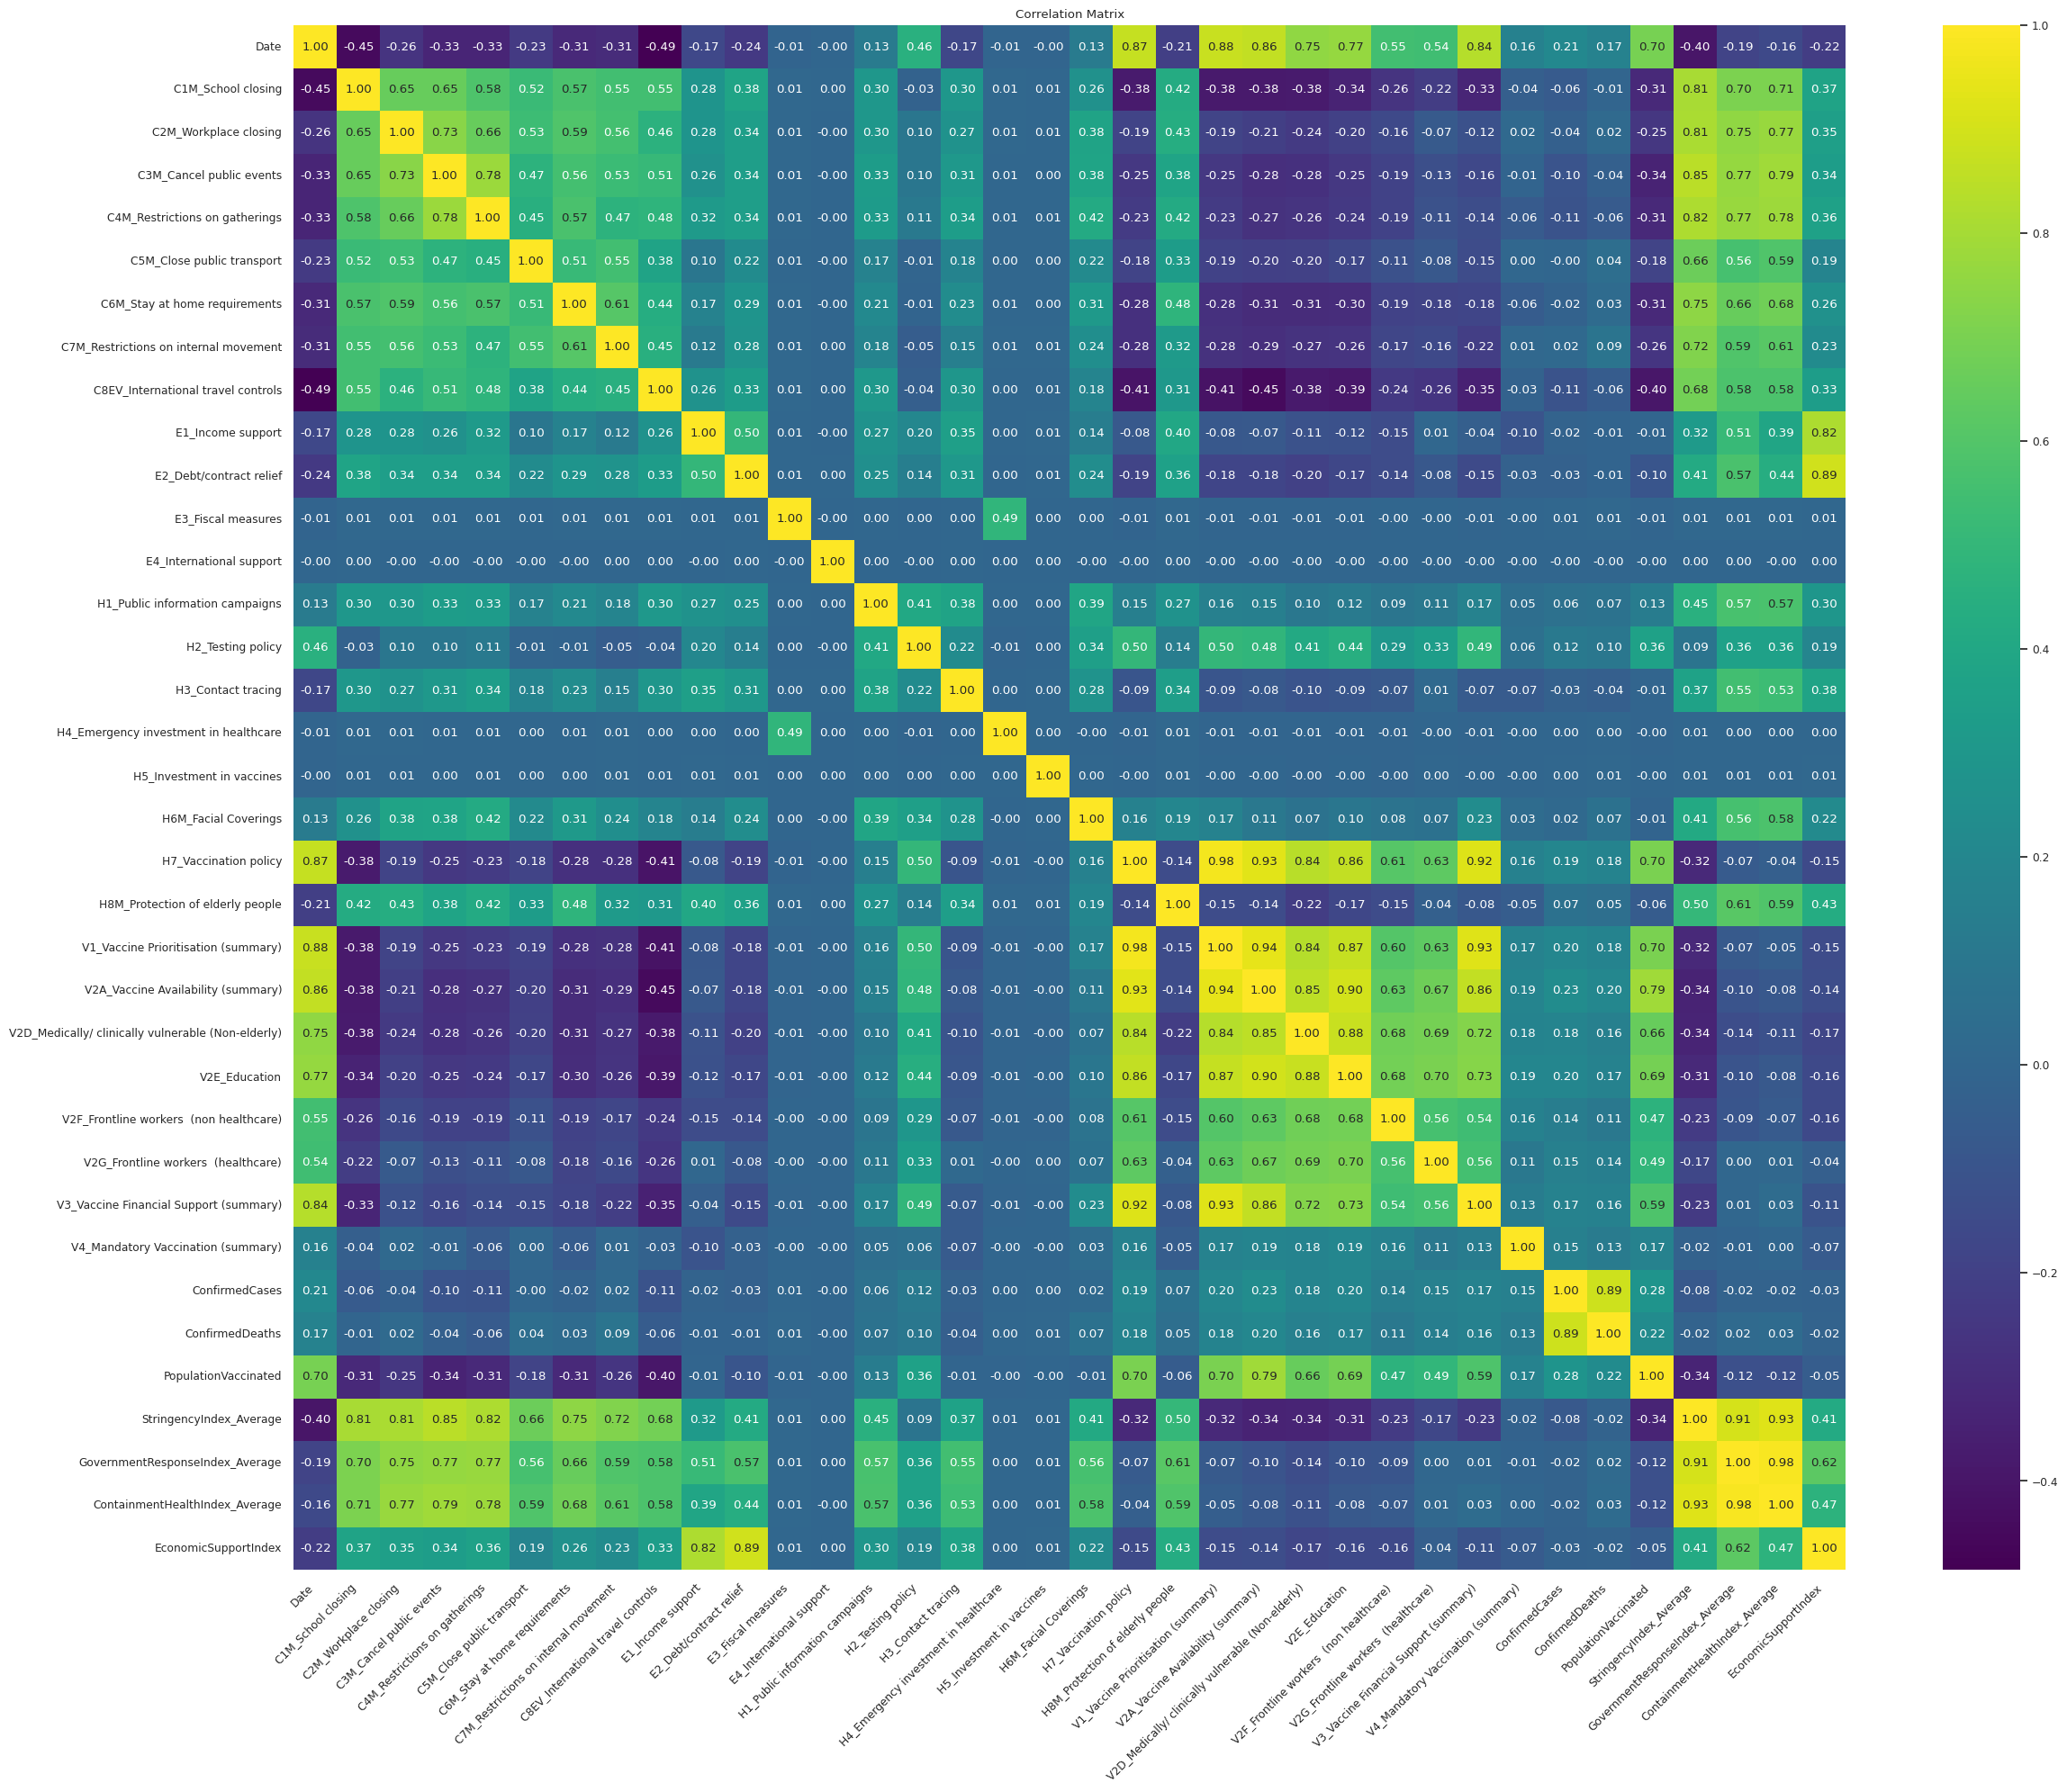

In [ ]:
correlation_matrix = International_Covid_data.corr(numeric_only=True)  # Explicitly set numeric_only to True to avoid FutureWarning

# Set the figure size and resolution
plt.figure(figsize=(25, 20))
sns.set(font_scale=0.8)  # Adjust font size for better readability

# Visualize correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Part 3: Exploratory Data Analysis

## 1. EDA for International COVID Comfiremd cases

### 1) EDA Prep

In [ ]:
International_Covid_data['Date'] = pd.to_datetime(International_Covid_data['Date'], format='%Y%m%d')
data = International_Covid_data[["CountryName", "Date", "ConfirmedCases", "ConfirmedDeaths"]]
data.head()

,CountryName,Date,ConfirmedCases,ConfirmedDeaths
0,Afghanistan,2020-01-01,0.0,0.0
1,Afghanistan,2020-01-02,0.0,0.0
2,Afghanistan,2020-01-03,0.0,0.0
3,Afghanistan,2020-01-04,0.0,0.0
4,Afghanistan,2020-01-05,0.0,0.0


In [ ]:
summed_cases_comfirmed = {}
for year in range(2020, 2023):
    year_data = data[data['Date'].dt.year == year]
    year_sum = year_data.groupby('CountryName')['ConfirmedCases'].sum()
    summed_cases_comfirmed[year] = year_sum

# Convert the result to DataFrame and adjust its value format
summed_cases_df = pd.concat(summed_cases_comfirmed, axis=1)
summed_cases_df
summed_cases_df_formatted = summed_cases_df.applymap('{:}'.format)

# Reset the index of the DataFrame
summed_cases_df_formatted.reset_index(inplace=True)

# Rename the columns and add Total column
summed_cases_df_formatted.columns = ['CountryName', '2020', '2021', '2022']
summed_cases_df_formatted[['2020', '2021', '2022']] = summed_cases_df_formatted[['2020', '2021', '2022']].apply(pd.to_numeric)
summed_cases_df_formatted['Total'] = summed_cases_df_formatted['2020'] + summed_cases_df_formatted['2021'] + summed_cases_df_formatted['2022']
confirmedCase_df = summed_cases_df_formatted.applymap('{:}'.format)

print(confirmedCase_df)

confirmed_cases_2020 = confirmedCase_df["2020"]
confirmed_cases_2021 = confirmedCase_df["2021"]
confirmed_cases_2022 = confirmedCase_df["2022"]
confirmed_cases_Total = confirmedCase_df["Total"]

     CountryName        2020         2021          2022         Total
0    Afghanistan   8501751.0   39518380.0    67783564.0   115803695.0
1        Albania   3727544.0   51106141.0   108004674.0   162838359.0
2        Algeria  10583375.0   57172988.0    96532073.0   164288436.0
3        Andorra    682822.0    5084330.0    15527738.0    21294890.0
4         Angola   1343410.0   14797145.0    36733077.0    52873632.0
..           ...         ...          ...           ...           ...
180    Venezuela  12300226.0   99533919.0   191843867.0   303678012.0
181      Vietnam    219337.0  135539309.0  3395033974.0  3530792620.0
182        Yemen    382306.0    2403947.0     4280922.0     7067175.0
183       Zambia   2433883.0   52593029.0   117791992.0   172818904.0
184     Zimbabwe   1336283.0   30065437.0    91162924.0   122564644.0

[185 rows x 5 columns]


<ipython-input-24-5d18a0f15200>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summed_cases_df_formatted = summed_cases_df.applymap('{:}'.format)
<ipython-input-24-5d18a0f15200>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  confirmedCase_df = summed_cases_df_formatted.applymap('{:}'.format)


In [ ]:
heatmap_data_2020 = confirmedCase_df[['CountryName', "2020"]].values.tolist()
heatmap_data_2020[:10]

[['Afghanistan', '8501751.0'],
 ['Albania', '3727544.0'],
 ['Algeria', '10583375.0'],
 ['Andorra', '682822.0'],
 ['Angola', '1343410.0'],
 ['Argentina', '148336421.0'],
 ['Aruba', '571837.0'],
 ['Australia', '5091224.0'],
 ['Austria', '21771909.0'],
 ['Azerbaijan', '12949032.0']]

In [ ]:
heatmap_data_2021 = confirmedCase_df[['CountryName', "2021"]].values.tolist()
heatmap_data_2021[:10]

[['Afghanistan', '39518380.0'],
 ['Albania', '51106141.0'],
 ['Algeria', '57172988.0'],
 ['Andorra', '5084330.0'],
 ['Angola', '14797145.0'],
 ['Argentina', '1440211060.0'],
 ['Aruba', '4361299.0'],
 ['Australia', '28433623.0'],
 ['Austria', '248771060.0'],
 ['Azerbaijan', '137425851.0']]

In [ ]:
heatmap_data_2022 = confirmedCase_df[['CountryName', "2022"]].values.tolist()
heatmap_data_2022[:10]

[['Afghanistan', '67783564.0'],
 ['Albania', '108004674.0'],
 ['Algeria', '96532073.0'],
 ['Andorra', '15527738.0'],
 ['Angola', '36733077.0'],
 ['Argentina', '3355238982.0'],
 ['Aruba', '14122907.0'],
 ['Australia', '2707065059.0'],
 ['Austria', '1544778286.0'],
 ['Azerbaijan', '286875651.0']]

In [ ]:
heatmap_data_Total = confirmedCase_df[['CountryName', "Total"]].values.tolist()
heatmap_data_Total[:10]

[['Afghanistan', '115803695.0'],
 ['Albania', '162838359.0'],
 ['Algeria', '164288436.0'],
 ['Andorra', '21294890.0'],
 ['Angola', '52873632.0'],
 ['Argentina', '4943786463.0'],
 ['Aruba', '19056043.0'],
 ['Australia', '2740589906.0'],
 ['Austria', '1815321255.0'],
 ['Azerbaijan', '437250534.0']]

### 2) International COVID Comfirmed Cases (Year 2020)


In [ ]:
color_palette = [
    '#B71C1C', '#C62828', '#D32F2F', '#E53935', '#F44336', '#EF5350',
    '#FF5252', '#FF6E6E', '#FF8A80', '#FFA4A4', '#FFCDD2', '#FFEBEE',
    '#FFF0F0', '#F5F5F5', '#FAFAFA', '#FFFFFF'
]

map_ = (
    Map()
    .add(
        series_name="Comfirmed case for 2020",
        data_pair=heatmap_data_2020,
        maptype="world",
        is_map_symbol_show=False
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title=" Current Confirmed Cases of COVID-19"),

        visualmap_opts=opts.VisualMapOpts(
            pieces=[
                {"min": 1000000000, "color": color_palette[0]},
                {"min": 100000000, "max": 999999999, "color": color_palette[1]},
                {"min": 10000000, "max": 99999999, "color": color_palette[2]},
                {"min": 1000000, "max": 9999999, "color": color_palette[3]},
                {"min": 600000, "max": 999999, "color": color_palette[4]},
                {"min": 900000, "max": 599999, "color": color_palette[5]},
                {"min": 600000, "max": 899999, "color": color_palette[6]},
                {"min": 300000, "max": 599999, "color": color_palette[7]},
                {"min": 100000, "max": 299999, "color": color_palette[8]},
                {"min": 70000, "max": 99999, "color": color_palette[9]},
                {"min": 40000, "max": 69999, "color": color_palette[10]},
                {"min": 10000, "max": 39999, "color": color_palette[11]},
                {"min": 5000, "max": 9999, "color": color_palette[12]},
                {"min": 1000, "max": 4999, "color": color_palette[13]},
                {"min": 100, "max": 999, "color": color_palette[14]},
                {"max": 99, "color": color_palette[15]}
            ],
            is_piecewise=True
        )
    )
)


map_.render_notebook()

# Render the map to an HTML file
map_.render("covid_map_2021.html")

# Display the HTML file in Google Colab
HTML('covid_map_2021.html')

### 3) International COVID Comfirmed Cases (Year 2021)


In [ ]:
color_palette = [
    '#B71C1C', '#C62828', '#D32F2F', '#E53935', '#F44336', '#EF5350',
    '#FF5252', '#FF6E6E', '#FF8A80', '#FFA4A4', '#FFCDD2', '#FFEBEE',
    '#FFF0F0', '#F5F5F5', '#FAFAFA', '#FFFFFF'
]

map_ = (
    Map()
    .add(
        series_name="Comfirmed case for 2021",
        data_pair=heatmap_data_2021,
        maptype="world",
        is_map_symbol_show=False
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title=" Current Confirmed Cases of COVID-19"),

        visualmap_opts=opts.VisualMapOpts(
            pieces=[
                {"min": 1000000000, "color": color_palette[0]},
                {"min": 100000000, "max": 999999999, "color": color_palette[1]},
                {"min": 10000000, "max": 99999999, "color": color_palette[2]},
                {"min": 1000000, "max": 9999999, "color": color_palette[3]},
                {"min": 600000, "max": 999999, "color": color_palette[4]},
                {"min": 900000, "max": 599999, "color": color_palette[5]},
                {"min": 600000, "max": 899999, "color": color_palette[6]},
                {"min": 300000, "max": 599999, "color": color_palette[7]},
                {"min": 100000, "max": 299999, "color": color_palette[8]},
                {"min": 70000, "max": 99999, "color": color_palette[9]},
                {"min": 40000, "max": 69999, "color": color_palette[10]},
                {"min": 10000, "max": 39999, "color": color_palette[11]},
                {"min": 5000, "max": 9999, "color": color_palette[12]},
                {"min": 1000, "max": 4999, "color": color_palette[13]},
                {"min": 100, "max": 999, "color": color_palette[14]},
                {"max": 99, "color": color_palette[15]}
            ],
            is_piecewise=True
        )
    )
)


map_.render_notebook()

# Render the map to an HTML file
map_.render("covid_confirmed_2021.html")

# Display the HTML file in Google Colab
HTML('covid_confirmed_2021.html')

### 4) International COVID Comfirmed Cases (Year 2022)


In [ ]:
color_palette = [
    '#B71C1C', '#C62828', '#D32F2F', '#E53935', '#F44336', '#EF5350',
    '#FF5252', '#FF6E6E', '#FF8A80', '#FFA4A4', '#FFCDD2', '#FFEBEE',
    '#FFF0F0', '#F5F5F5', '#FAFAFA', '#FFFFFF'
]

map_ = (
    Map()
    .add(
        series_name="Comfirmed case for 2022",
        data_pair=heatmap_data_2022,
        maptype="world",
        is_map_symbol_show=False
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title=" Current Confirmed Cases of COVID-19"),

        visualmap_opts=opts.VisualMapOpts(
            pieces=[
                {"min": 1000000000, "color": color_palette[0]},
                {"min": 100000000, "max": 999999999, "color": color_palette[1]},
                {"min": 10000000, "max": 99999999, "color": color_palette[2]},
                {"min": 1000000, "max": 9999999, "color": color_palette[3]},
                {"min": 600000, "max": 999999, "color": color_palette[4]},
                {"min": 900000, "max": 599999, "color": color_palette[5]},
                {"min": 600000, "max": 899999, "color": color_palette[6]},
                {"min": 300000, "max": 599999, "color": color_palette[7]},
                {"min": 100000, "max": 299999, "color": color_palette[8]},
                {"min": 70000, "max": 99999, "color": color_palette[9]},
                {"min": 40000, "max": 69999, "color": color_palette[10]},
                {"min": 10000, "max": 39999, "color": color_palette[11]},
                {"min": 5000, "max": 9999, "color": color_palette[12]},
                {"min": 1000, "max": 4999, "color": color_palette[13]},
                {"min": 100, "max": 999, "color": color_palette[14]},
                {"max": 99, "color": color_palette[15]}
            ],
            is_piecewise=True
        )
    )
)


map_.render_notebook()

# Render the map to an HTML file
map_.render("covid_confirmed_2022.html")

# Display the HTML file in Google Colab
HTML('covid_confirmed_2022.html')

## 2. EDA for International COVID Death Cases

### 1) EDA Prep

In [ ]:
summed_cases_death = {}
for year in range(2020, 2023):
    year_data = data[data['Date'].dt.year == year]
    year_sum = year_data.groupby('CountryName')['ConfirmedDeaths'].sum()
    summed_cases_death[year] = year_sum

# Convert the result to DataFrame and adjust its value format
summed_cases_df = pd.concat(summed_cases_death, axis=1)
summed_cases_df
summed_cases_df_formatted = summed_cases_df.applymap('{:}'.format)

# Reset the index of the DataFrame
summed_cases_df_formatted.reset_index(inplace=True)

# Rename the columns and add Total column
summed_cases_df_formatted.columns = ['CountryName', '2020', '2021', '2022']
summed_cases_df_formatted[['2020', '2021', '2022']] = summed_cases_df_formatted[['2020', '2021', '2022']].apply(pd.to_numeric)
summed_cases_df_formatted['Total'] = summed_cases_df_formatted['2020'] + summed_cases_df_formatted['2021'] + summed_cases_df_formatted['2022']
confirmedDeath_df = summed_cases_df_formatted


summed_cases_df_formatted[['2020', '2021', '2022', 'Total']] = summed_cases_df_formatted[['2020', '2021', '2022', 'Total']].apply(pd.to_numeric)

confirmedDeath_df['Total'] = pd.to_numeric(confirmedDeath_df['Total'])
confirmedCase_df["Total"] = pd.to_numeric(confirmedCase_df["Total"])
confirmedDeath_df["Death_rate"] =  confirmedDeath_df["Total"] / confirmedCase_df["Total"]
print(confirmedDeath_df)

confirmed_death_2020 = confirmedDeath_df["2020"]
confirmed_death_2021 = confirmedDeath_df["2021"]
confirmed_death_2022 = confirmedDeath_df["2022"]
confirmed_death_Total = confirmedDeath_df["Total"]


Death_rate_df = confirmedDeath_df[["CountryName", "Death_rate"]]
print(Death_rate_df)

# Sort the DataFrame by death rate in descending order
Death_rate_df = Death_rate_df.sort_values(by='Death_rate', ascending=False)
'plasma'

     CountryName      2020       2021        2022       Total  Death_rate
0    Afghanistan  296447.0  1778958.0   2810220.0   4885625.0    0.042189
1        Albania   88375.0   871276.0   1281171.0   2240822.0    0.013761
2        Algeria  377806.0  1563862.0   2491699.0   4433367.0    0.026985
3        Andorra   15492.0    44641.0     55837.0    115970.0    0.005446
4         Angola   36818.0   368673.0    695036.0   1100527.0    0.020814
..           ...       ...        ...         ...         ...         ...
180    Venezuela  106495.0  1141073.0   2085017.0   3332585.0    0.010974
181      Vietnam    4908.0  2936699.0  15332101.0  18273708.0    0.005176
182        Yemen  108944.0   480906.0    778784.0   1368634.0    0.193661
183       Zambia   53042.0   849928.0   1453709.0   2356679.0    0.013637
184     Zimbabwe   36683.0  1029500.0   2010155.0   3076338.0    0.025100

[185 rows x 6 columns]
     CountryName  Death_rate
0    Afghanistan    0.042189
1        Albania    0.013761
2

<ipython-input-32-70797fa29567>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summed_cases_df_formatted = summed_cases_df.applymap('{:}'.format)


'plasma'

In [ ]:
rank1 = confirmedDeath_df[['CountryName', '2020']].sort_values(by='2020', ascending=False).values
rank2 = confirmedDeath_df[['CountryName', '2021']].sort_values(by='2021', ascending=False).values
rank3 = confirmedDeath_df[['CountryName', '2022']].sort_values(by='2022', ascending=False).values
rank4 = confirmedDeath_df[['CountryName', 'Total']].sort_values(by='Total', ascending=False).values
rank5 = confirmedDeath_df[['CountryName', 'Death_rate']].sort_values(by='Death_rate', ascending=False).values

### 2) Comfirmed Internation COVID Death Cases (Year 2020)

In [ ]:
from pyecharts.charts import Pie

pie = Pie().add("Cumulative death",
                rank1,
                radius = ["20%", "70%"],
                center = ["50%", "50%"],
                rosetype = "radius")

pie.set_global_opts(title_opts = opts.TitleOpts(title="Covid-19 Comfirmed death for 2020",
                                                pos_right = '15%'),
                    legend_opts = opts.LegendOpts(
                                                orient='vertical',
                                                pos_right="10%",
                                                pos_top="150%"))

pie.set_series_opts(label_opts = opts.LabelOpts(formatter="{b} : {d}%"))

pie.render_notebook()

# Render the map to an HTML file
pie.render("covid_death_2020.html")

# Display the HTML file in Google Colab
HTML('covid_death_2020.html')

### 3) Comfirmed Internation COVID Death Cases (Year 2021)

In [ ]:
from pyecharts.charts import Pie

pie = Pie().add("Cumulative death",
                rank2,
                radius = ["20%", "70%"],
                center = ["50%", "50%"],
                rosetype = "radius")

pie.set_global_opts(title_opts = opts.TitleOpts(title="Covid-19 Comfirmed death for 2021",
                                                pos_right = '15%'),
                    legend_opts = opts.LegendOpts(
                                                orient='vertical',
                                                pos_right="10%",
                                                pos_top="150%"))

pie.set_series_opts(label_opts = opts.LabelOpts(formatter="{b} : {d}%"))

pie.render_notebook()

# Render the map to an HTML file
pie.render("covid_death_2021.html")

# Display the HTML file in Google Colab
HTML('covid_death_2021.html')

### 4) Comfirmed Internation COVID Death Cases (Year 2022)

In [ ]:
from pyecharts.charts import Pie

pie = Pie().add("Cumulative death",
                rank3,
                radius = ["20%", "70%"],
                center = ["50%", "50%"],
                rosetype = "radius")

pie.set_global_opts(title_opts = opts.TitleOpts(title="Covid-19 Comfirmed death for 2022",
                                                pos_right = '15%'),
                    legend_opts = opts.LegendOpts(
                                                orient='vertical',
                                                pos_right="10%",
                                                pos_top="150%"))

pie.set_series_opts(label_opts = opts.LabelOpts(formatter="{b} : {d}%"))

pie.render_notebook()

# Render the map to an HTML file
pie.render("covid_death_2022.html")

# Display the HTML file in Google Colab
HTML('covid_death_2022.html')

### 3) Top10 and Lower10 Death Rate Countries

<ipython-input-37-b36da6310a70>:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


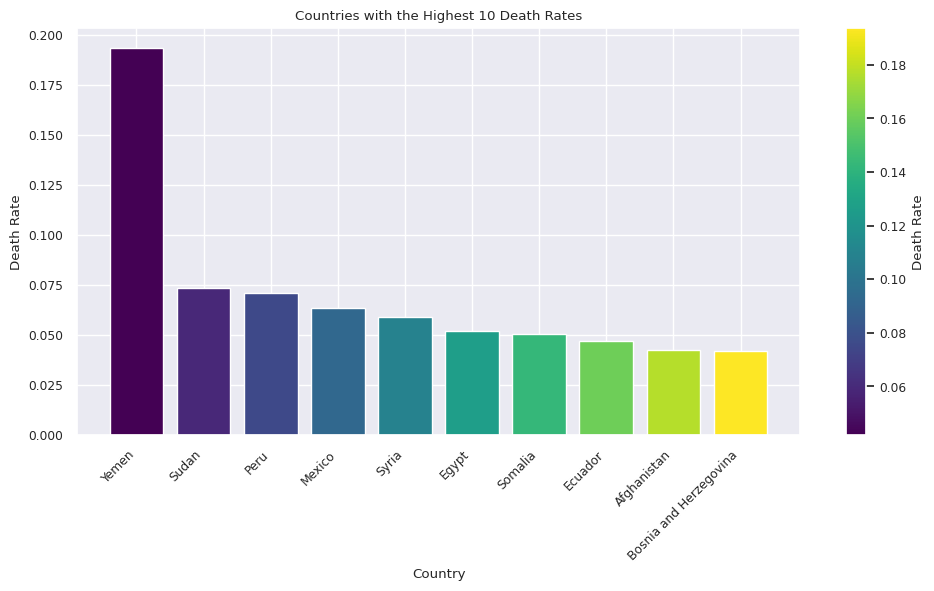

<ipython-input-37-b36da6310a70>:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


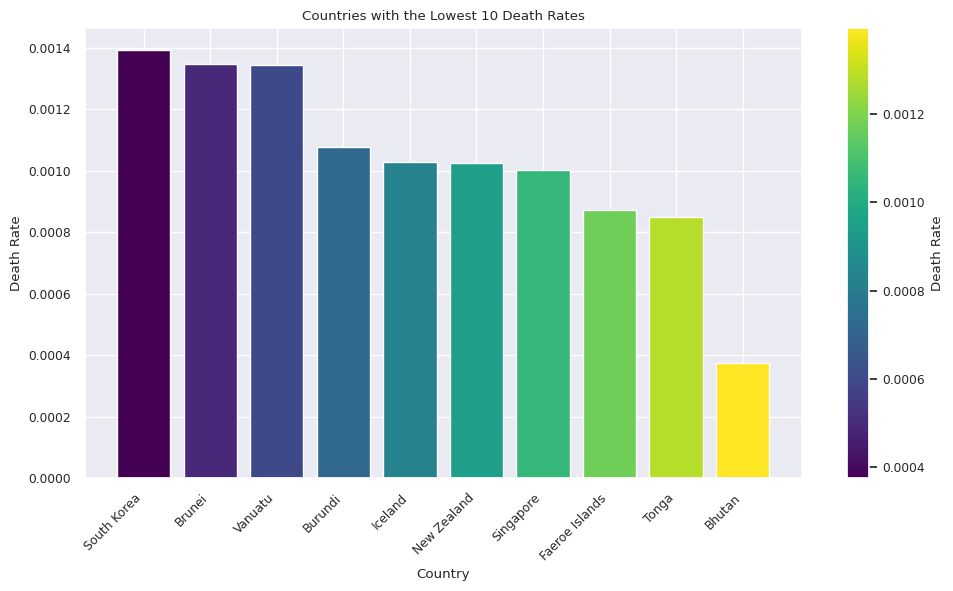

In [ ]:
# 1. Select top N countries
top_n = 10  # Change this value to display a different number of countries
top_countries = Death_rate_df.head(top_n)

# Create a bar plot for top N countries
colors = plt.cm.viridis(np.linspace(0, 1, top_n))

plt.figure(figsize=(10, 6))
bars = plt.bar(top_countries['CountryName'], top_countries['Death_rate'], color=colors)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.title(f'Countries with the Highest {top_n} Death Rates')
plt.xticks(rotation=45, ha='right')

# Add a colorbar to indicate the gradient
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=top_countries['Death_rate'].min(), vmax=top_countries['Death_rate'].max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Death Rate')

plt.tight_layout()
plt.show()

# 2. Select bottom N countries
bottom_n = 10  # Change this value to display a different number of countries with lowest death rates
bottom_countries = Death_rate_df.tail(bottom_n)

# Define colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, bottom_n))

# Create a bar plot for bottom N countries
plt.figure(figsize=(10, 6))
bars = plt.bar(bottom_countries['CountryName'], bottom_countries['Death_rate'], color=colors)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.title(f'Countries with the Lowest {bottom_n} Death Rates')
plt.xticks(rotation=45, ha='right')

# Add a colorbar to indicate the gradient
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=bottom_countries['Death_rate'].min(), vmax=bottom_countries['Death_rate'].max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Death Rate')

plt.tight_layout()
plt.show()

<ipython-input-38-34cb3147ec3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['Date'] = pd.to_datetime(us_data['Date'])
<ipython-input-38-34cb3147ec3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data.drop(columns=['index'], inplace=True)


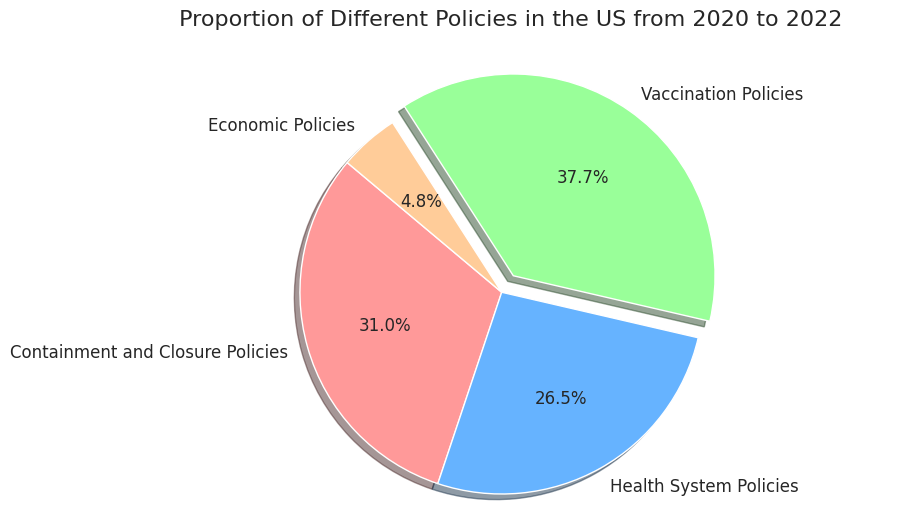

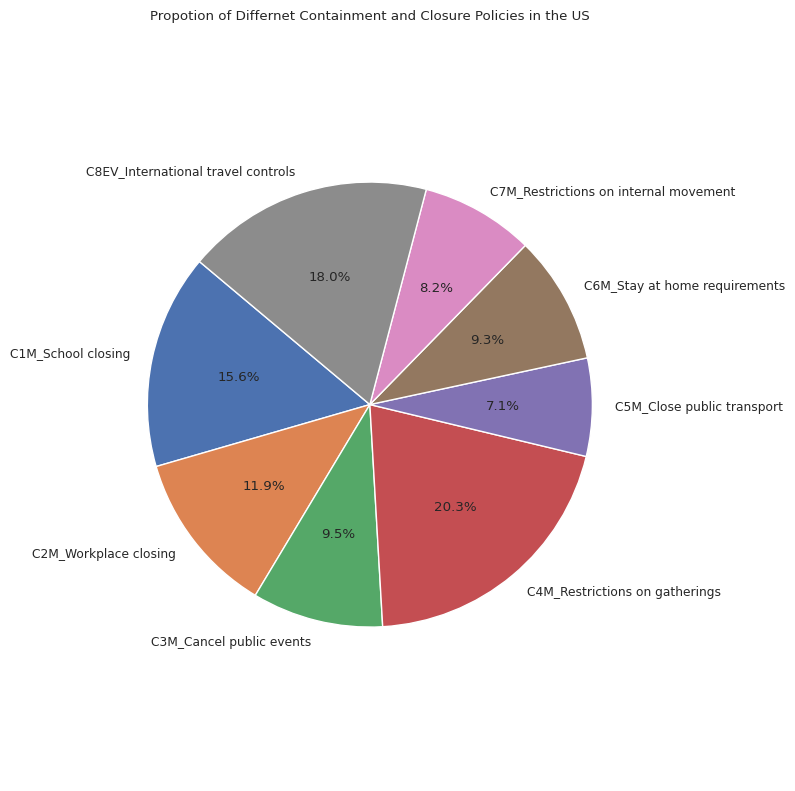

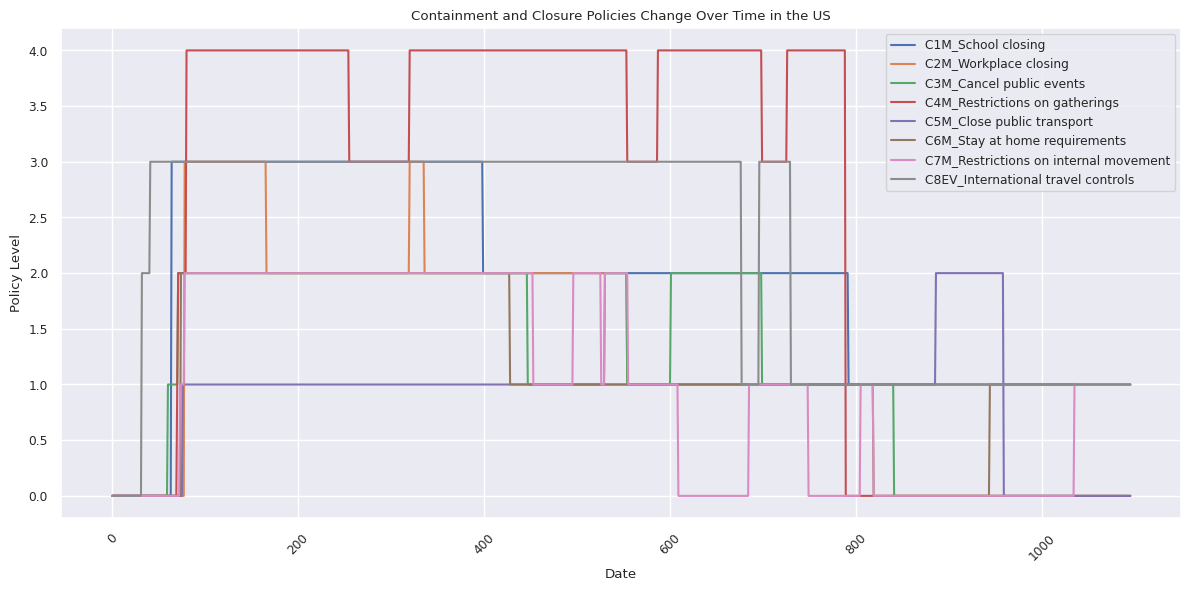

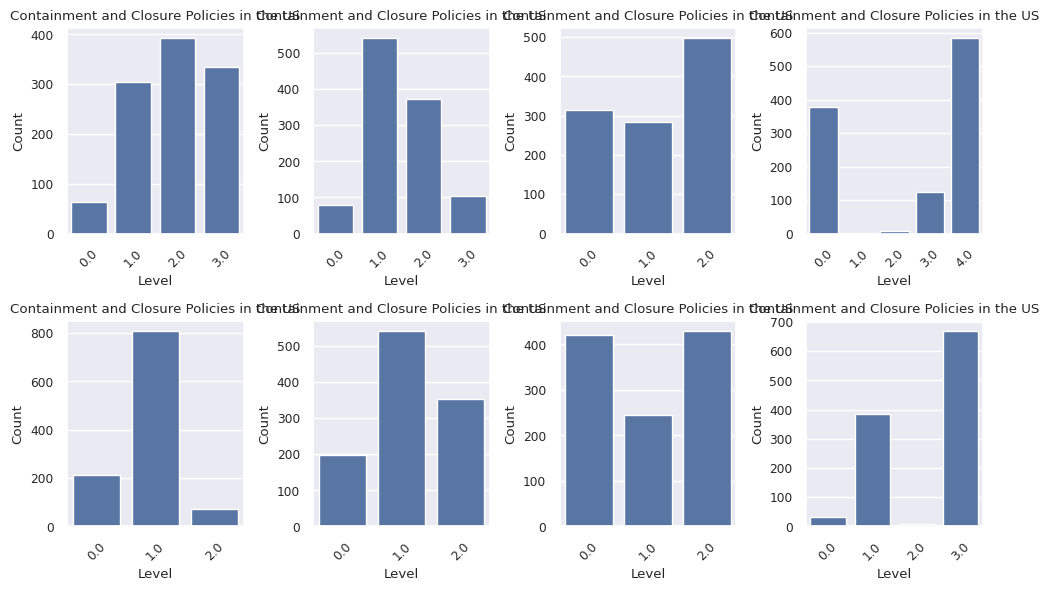

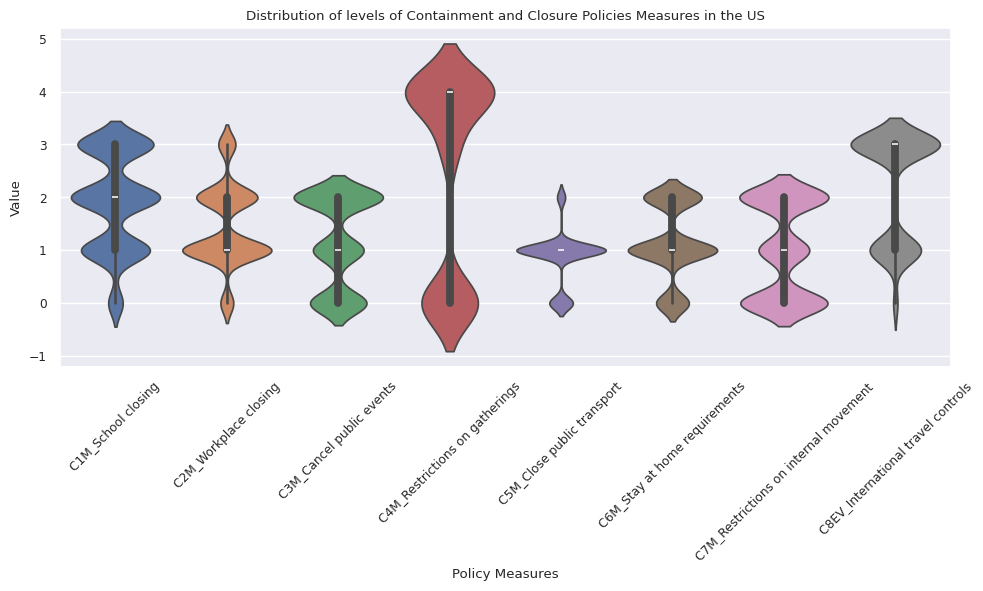

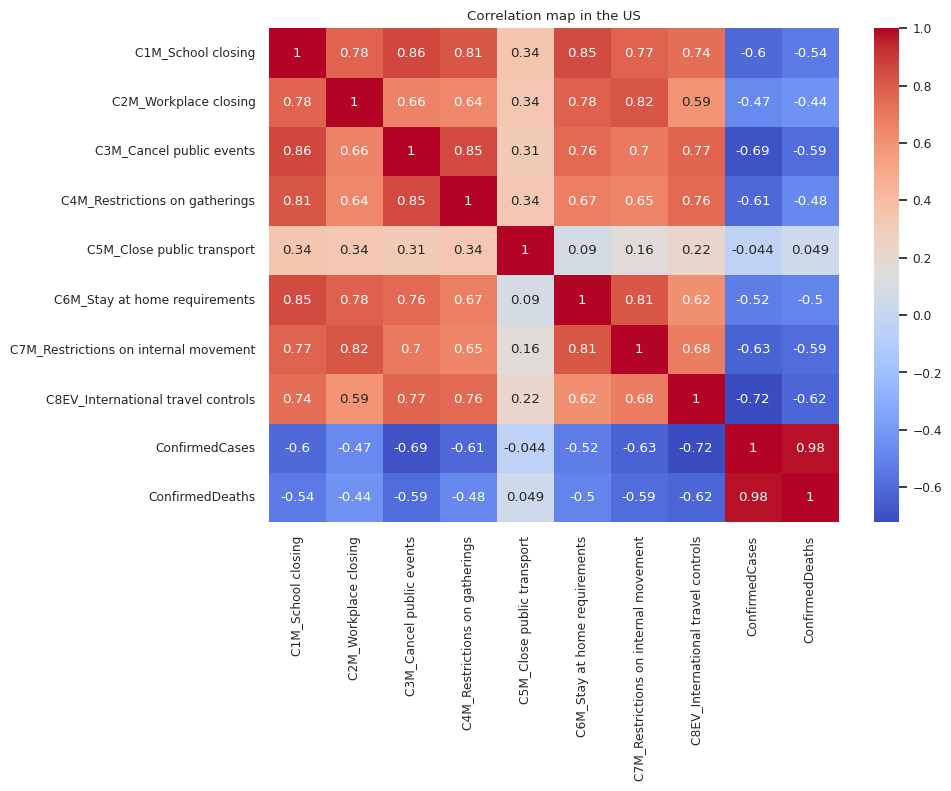

In [ ]:
# 1.Pie chart for the policy
# Filter policy columns starting with 'C', 'H', 'V', and 'E'
us_data = International_Covid_data[International_Covid_data["CountryName"] == "United States"]
us_data['Date'] = pd.to_datetime(us_data['Date'])
us_data.reset_index(inplace=True)
us_data.drop(columns=['index'], inplace=True)

c_policies = [col for col in us_data.columns if col.startswith('C')]

# List of elements to remove
elements_to_remove = ["CountryName", "ConfirmedCases", "ConfirmedDeaths", "ContainmentHealthIndex_Average"]

# Remove each element from the list
for element in elements_to_remove:
    if element in c_policies:
        c_policies.remove(element)

h_policies = [col for col in us_data.columns if col.startswith('H')]
v_policies = [col for col in us_data.columns if col.startswith('V')]
e_policies = [col for col in us_data.columns if col.startswith('E')]
e_policies.remove("EconomicSupportIndex")

# Count the number of policies in each category
c_count = sum(us_data[col].astype(bool).sum(axis=0) for col in c_policies)
h_count = sum(us_data[col].astype(bool).sum(axis=0) for col in h_policies)
v_count = sum(us_data[col].astype(bool).sum(axis=0) for col in v_policies)
e_count = sum(us_data[col].astype(bool).sum(axis=0) for col in e_policies)

# Plotting
labels = ['Containment and Closure Policies', 'Health System Policies', 'Vaccination Policies', 'Economic Policies']
sizes = [c_count, h_count, v_count, e_count]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0, 0, 0.1, 0)  # explode the 1st slice (C Policies)

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, textprops={'fontsize': 12})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(" Proportion of Different Policies in the US from 2020 to 2022", fontsize=16, pad=20)
plt.show()

# 2. Pie chart for C policy
policy_columns = ['C1M_School closing', 'C2M_Workplace closing', 'C3M_Cancel public events',
                  'C4M_Restrictions on gatherings', 'C5M_Close public transport',
                  'C6M_Stay at home requirements', 'C7M_Restrictions on internal movement',
                  'C8EV_International travel controls']
policy_counts = us_data[policy_columns].sum()

plt.figure(figsize=(8, 8))
plt.pie(policy_counts.values, labels=policy_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Propotion of Differnet Containment and Closure Policies in the US')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


# 3. Line plot for each C policy over time
plt.figure(figsize=(12, 6))
for policy in ['C1M_School closing', 'C2M_Workplace closing', 'C3M_Cancel public events',
               'C4M_Restrictions on gatherings', 'C5M_Close public transport',
               'C6M_Stay at home requirements', 'C7M_Restrictions on internal movement',
               'C8EV_International travel controls']:
    sns.lineplot(data=us_data[policy], label=policy)
plt.title('Containment and Closure Policies Change Over Time in the US')
plt.xlabel('Date')
plt.ylabel('Policy Level')
plt.legend(loc='upper right')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4. Bar plot showing the count of each C policy level
plt.figure(figsize=(10, 6))
for i, policy in enumerate(['C1M_School closing', 'C2M_Workplace closing', 'C3M_Cancel public events',
                            'C4M_Restrictions on gatherings', 'C5M_Close public transport',
                            'C6M_Stay at home requirements', 'C7M_Restrictions on internal movement',
                            'C8EV_International travel controls'], start=1):
    plt.subplot(2, 4, i)
    sns.countplot(data=us_data, x=policy)
    plt.title("Containment and Closure Policies in the US")
    plt.xlabel('Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Define the policy columns
policy_columns = ['C1M_School closing', 'C2M_Workplace closing', 'C3M_Cancel public events',
                  'C4M_Restrictions on gatherings', 'C5M_Close public transport',
                  'C6M_Stay at home requirements', 'C7M_Restrictions on internal movement',
                  'C8EV_International travel controls']

# Violin Plot - Distribution of Policy Measures
plt.figure(figsize=(10, 6))
sns.violinplot(data=us_data[policy_columns])
plt.title('Distribution of levels of Containment and Closure Policies Measures in the US')
plt.xlabel('Policy Measures')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Heatmap showing correlation between policies
plt.figure(figsize=(10, 8))
sns.heatmap(us_data[['C1M_School closing', 'C2M_Workplace closing', 'C3M_Cancel public events',
                     'C4M_Restrictions on gatherings', 'C5M_Close public transport',
                     'C6M_Stay at home requirements', 'C7M_Restrictions on internal movement',
                     'C8EV_International travel controls', "ConfirmedCases", "ConfirmedDeaths"]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation map in the US')
plt.tight_layout()
plt.show()


In [ ]:
International_Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 40 columns):
 #   Column                                                                           Non-Null Count   Dtype         
---  ------                                                                           --------------   -----         
 0   CountryName                                                                      202760 non-null  object        
 1   Date                                                                             202760 non-null  datetime64[ns]
 2   C1M_School closing                                                               202760 non-null  float64       
 3   C2M_Workplace closing                                                            202760 non-null  float64       
 4   C3M_Cancel public events                                                         202760 non-null  float64       
 5   C4M_Restrictions on gatherings                            

In [ ]:
International_Covid_data["V2B_Vaccine age eligibility/availability age floor (general population summary)"]

,V2B_Vaccine age eligibility/availability age floor (general population summary)
0,16-19 yrs
1,16-19 yrs
2,16-19 yrs
3,16-19 yrs
4,16-19 yrs
...,...
202755,5-15 yrs
202756,5-15 yrs
202757,5-15 yrs
202758,5-15 yrs


In [ ]:
International_Covid_data["V2C_Vaccine age eligibility/availability age floor (at risk summary)"]

,V2C_Vaccine age eligibility/availability age floor (at risk summary)
0,16-19 yrs
1,16-19 yrs
2,16-19 yrs
3,16-19 yrs
4,16-19 yrs
...,...
202755,5-15 yrs
202756,5-15 yrs
202757,5-15 yrs
202758,5-15 yrs


In [ ]:
International_Covid_data["MajorityVaccinated"]

,MajorityVaccinated
0,NV
1,NV
2,NV
3,NV
4,NV
...,...
202755,NV
202756,NV
202757,NV
202758,NV


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode 'V2B_Vaccine age eligibility/availability age floor (general population summary)'
International_Covid_data['V2B_Vaccine age eligibility/availability age floor (general population summary)'] = label_encoder.fit_transform(International_Covid_data['V2B_Vaccine age eligibility/availability age floor (general population summary)'])

# Encode 'V2C_Vaccine age eligibility/availability age floor (at risk summary)'
International_Covid_data['V2C_Vaccine age eligibility/availability age floor (at risk summary)'] = label_encoder.fit_transform(International_Covid_data['V2C_Vaccine age eligibility/availability age floor (at risk summary)'])

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# One-Hot Encoding for 'MajorityVaccinated' column
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = one_hot_encoder.fit_transform(International_Covid_data[['MajorityVaccinated']])

# Convert the encoded columns to a DataFrame
encoded_columns_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(['MajorityVaccinated']))

# Concatenate the encoded columns back to the original dataframe
International_Covid_data = pd.concat([International_Covid_data, encoded_columns_df], axis=1)

# Drop the original 'MajorityVaccinated' column
International_Covid_data.drop(['MajorityVaccinated'], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Part 4: Model Training

In [ ]:
# Feature Selection
# Assuming 'ConfirmedCases' and 'ConfirmedDeaths' are the target variables we want to predict
X = International_Covid_data.drop(['ConfirmedCases', 'ConfirmedDeaths', 'Date', 'CountryName'], axis=1)
y = International_Covid_data[['ConfirmedCases', 'ConfirmedDeaths']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('Test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

Training data has 162208 observation with 36 features
Test data has 40552 observation with 36 features


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate and print evaluation metrics
def print_regression_metrics(y_true, y_pred, model_name):
    rmse_cases = mean_squared_error(y_true['ConfirmedCases'], y_pred[:, 0], squared=False)
    rmse_deaths = mean_squared_error(y_true['ConfirmedDeaths'], y_pred[:, 1], squared=False)
    mae_cases = mean_absolute_error(y_true['ConfirmedCases'], y_pred[:, 0])
    mae_deaths = mean_absolute_error(y_true['ConfirmedDeaths'], y_pred[:, 1])
    r2_cases = r2_score(y_true['ConfirmedCases'], y_pred[:, 0])
    r2_deaths = r2_score(y_true['ConfirmedDeaths'], y_pred[:, 1])

    print(f"{model_name} - RMSE for ConfirmedCases: {rmse_cases}")
    print(f"{model_name} - RMSE for ConfirmedDeaths: {rmse_deaths}")
    print(f"{model_name} - MAE for ConfirmedCases: {mae_cases}")
    print(f"{model_name} - MAE for ConfirmedDeaths: {mae_deaths}")
    print(f"{model_name} - R2 for ConfirmedCases: {r2_cases}")
    print(f"{model_name} - R2 for ConfirmedDeaths: {r2_deaths}")

# Train and evaluate Linear Regression model
lr_model = MultiOutputRegressor(LinearRegression())
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print_regression_metrics(y_test, y_pred_lr, "Linear Regression")


# Train and evaluate Random Forest model
rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print_regression_metrics(y_test, y_pred_rf, "Random Forest")

# Train and evaluate Gradient Boosting model
gb_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print_regression_metrics(y_test, y_pred_gb, "Gradient Boosting")

# Train and evaluate XGBoost model
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(random_state=42))
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print_regression_metrics(y_test, y_pred_xgb, "XGBoost")

# Train and evaluate Extra Trees model
et_model = MultiOutputRegressor(ExtraTreesRegressor(random_state=42))
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)
print_regression_metrics(y_test, y_pred_et, "Extra Trees")

# Train and evaluate KNN model
knn_model = MultiOutputRegressor(KNeighborsRegressor())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print_regression_metrics(y_test, y_pred_knn, "KNN")





Linear Regression - RMSE for ConfirmedCases: 5127411.65964288
Linear Regression - RMSE for ConfirmedDeaths: 68473.34311263345
Linear Regression - MAE for ConfirmedCases: 2116257.1542458897
Linear Regression - MAE for ConfirmedDeaths: 30452.962374167997
Linear Regression - R2 for ConfirmedCases: 0.1771277644226752
Linear Regression - R2 for ConfirmedDeaths: 0.16747006857316826
Random Forest - RMSE for ConfirmedCases: 139539.62638559754
Random Forest - RMSE for ConfirmedDeaths: 2631.9666579906925
Random Forest - MAE for ConfirmedCases: 14326.646246522527
Random Forest - MAE for ConfirmedDeaths: 221.9490806859959
Random Forest - R2 for ConfirmedCases: 0.9993905597303117
Random Forest - R2 for ConfirmedDeaths: 0.9987699647469508
Gradient Boosting - RMSE for ConfirmedCases: 3441952.9537810087
Gradient Boosting - RMSE for ConfirmedDeaths: 50252.6863791806
Gradient Boosting - MAE for ConfirmedCases: 1257939.6986367782
Gradient Boosting - MAE for ConfirmedDeaths: 20502.05661872219
Gradient Boo